In [94]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read dataset
dataset = pd.read_csv('mistermsample.csv')
dataset.head()

,Date,Load,Flow,Resistance,Material
0,2022-09-27 19:49:42.792443,8,584,679,lead_1
1,2022-10-17 19:49:42.792443,347,377,18,silver_32_jagged
2,2022-09-24 19:49:42.792443,185,839,305,Gold_99
3,2022-10-01 19:49:42.792443,432,264,896,silver_32
4,2022-10-03 19:49:42.792443,116,686,52,Gold_99


In [95]:
#shape of data

print(dataset.shape)

(1000, 5)


In [96]:
#find columns
dataset.columns

Index(['Date', 'Load', 'Flow', 'Resistance', 'Material'], dtype='object')

In [97]:
#find unique values of last column
dataset['Material'].unique()

array(['lead_1', 'silver_32_jagged', 'Gold_99', 'silver_32'], dtype=object)

In [98]:
dataset['Material'].value_counts()

Gold_99             262
silver_32_jagged    256
silver_32           251
lead_1              231
Name: Material, dtype: int64

In [99]:
#find correlation

dataset.corr()

C:\Users\arfan.shah\AppData\Local\Temp\ipykernel_11860\1472102444.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Load,Flow,Resistance
Load,1.000000,0.015243,0.013515
Flow,0.015243,1.000000,-0.020263
Resistance,0.013515,-0.020263,1.000000


In [100]:
#Question a

#we will find shape indexed at 1
print(dataset.shape[0])

1000


so there are 1000 rows

In [101]:
#Question b

#first lets find the number of unique vlaues in material column
print(dataset['Material'].value_counts())

#since we have only two types of rows which countain silver_32

a = dataset[dataset['Material'] == 'silver_32_jagged']
b = dataset[dataset['Material'] == 'silver_32']

#here we will append one set on another to get the whole rows
c = a.append(b)
print(c)
print(len(c))

Gold_99             262
silver_32_jagged    256
silver_32           251
lead_1              231
Name: Material, dtype: int64
                           Date  Load  Flow  Resistance          Material
1    2022-10-17 19:49:42.792443   347   377          18  silver_32_jagged
9    2022-09-25 19:49:42.792443   326   119         872  silver_32_jagged
10   2022-09-29 19:49:42.792443   408   184         137  silver_32_jagged
11   2022-10-10 19:49:42.792443   302   933         945  silver_32_jagged
13   2022-09-30 19:49:42.792443   562   422         576  silver_32_jagged
..                          ...   ...   ...         ...               ...
973  2022-10-15 19:49:42.792443   843   738         976         silver_32
981  2022-10-11 19:49:42.792443   225   981         435         silver_32
986  2022-09-24 19:49:42.792443   497   228         647         silver_32
987  2022-10-06 19:49:42.792443   945   820         517         silver_32
991  2022-10-20 19:49:42.792443   539   287         475      

C:\Users\arfan.shah\AppData\Local\Temp\ipykernel_11860\4010728941.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = a.append(b)


In [102]:
#Question c

#now lest change the format
dataset["Date"] = pd.to_datetime(dataset["Date"], format='%Y-%m-%d %H:%M:%S')

#lets extract time from dataframe
def time(date):
    return date.strftime("%H:%M:%S")

#now make separate columns for each date and time
dataset["Date"] = dataset["Date"].dt.date
dataset["Time"] = dataset.Date.apply(time)

print(dataset.head(5))


         Date  Load  Flow  Resistance          Material      Time
0  2022-09-27     8   584         679            lead_1  00:00:00
1  2022-10-17   347   377          18  silver_32_jagged  00:00:00
2  2022-09-24   185   839         305           Gold_99  00:00:00
3  2022-10-01   432   264         896         silver_32  00:00:00
4  2022-10-03   116   686          52           Gold_99  00:00:00


In [ ]:
#Question d

#daily flow and load
d_flow = dataset.Flow.groupby(dataset.Date.dt.day).mean()
d_load = dataset.Load.groupby(datset.Date.dt.day).mean()

#monthly flow and load
m_flow = dadatset.Flow.groupby(dataset.Date.dt.month).mean()
m_load = dataset.Load.groupby(dataset.Date.dt.month).mean()



plt.scatter(d_load, d_flow, color="Red")
plt.plot(m_load, m_flow)
plt.title("Load VS Flow")
plt.xlabel("Load")
plt.ylabel("Flow")
plt.show()

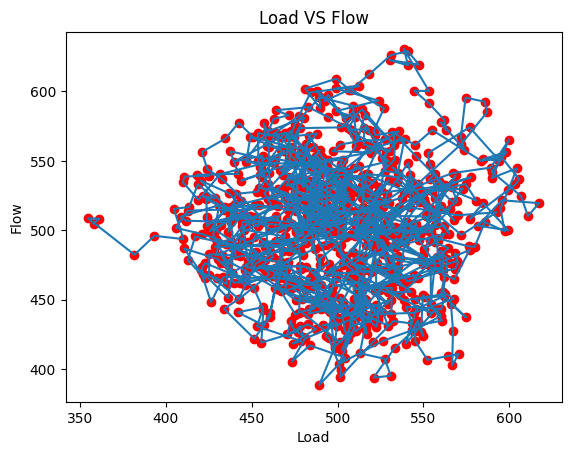

In [92]:
#Question c

dataset['load'] = dataset['Load'].rolling(30).mean()
dataset['flow'] = dataset['Flow'].rolling(30).mean()

plt.scatter(dataset['load'], dataset['flow'], color="Red")
plt.plot(dataset['load'], dataset['flow'])
plt.title("Load VS Flow")
plt.xlabel("Load")
plt.ylabel("Flow")
plt.show()


In [74]:
#Question e

#create a new column 

def X(r):
    if (r > 20):
        return 'A'
    elif r>50:
        return 'A_B'
    else :
        return str ( abs (r**2))


new_dataset = dataset["Resistance"].apply(X)

dataset["Type"] = new_dataset

dataset.head(5)

,Date,Load,Flow,Resistance,Material,Type
0,2022-09-27 19:49:42.792443,8,584,679,lead_1,A
1,2022-10-17 19:49:42.792443,347,377,18,silver_32_jagged,324
2,2022-09-24 19:49:42.792443,185,839,305,Gold_99,A
3,2022-10-01 19:49:42.792443,432,264,896,silver_32,A
4,2022-10-03 19:49:42.792443,116,686,52,Gold_99,A


In [75]:
#Question f

dataset['Material'] = dataset['Material'].map(str) + ' ' + dataset['Type'].map(str)


print(dataset.head(5))

                         Date  Load  Flow  Resistance              Material  \
0  2022-09-27 19:49:42.792443     8   584         679              lead_1 A   
1  2022-10-17 19:49:42.792443   347   377          18  silver_32_jagged 324   
2  2022-09-24 19:49:42.792443   185   839         305             Gold_99 A   
3  2022-10-01 19:49:42.792443   432   264         896           silver_32 A   
4  2022-10-03 19:49:42.792443   116   686          52             Gold_99 A   

  Type  
0    A  
1  324  
2    A  
3    A  
4    A  
